### Librerias y Lectura de la Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
ruta = r'C:\Users\Manuel Montufar\Documents\ProyectosManu\Escuela\Concentración\Reto\Bases\train.csv'

In [3]:
df = pd.read_csv(f'{ruta}')

In [4]:
print(df)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [40]:
print(df.tail())

     PassengerId HomePlanet  CryoSleep    Destination  Age  VIP  RoomService  \
8688     9276_01     Europa          0    55 Cancri e   41    1          0.0   
8689     9278_01      Earth          1  PSO J318.5-22   18    0          0.0   
8690     9279_01      Earth          0    TRAPPIST-1e   26    0          0.0   
8691     9280_01     Europa          0    55 Cancri e   32    0          0.0   
8692     9280_02     Europa          0    TRAPPIST-1e   44    0        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  \
8688     6819.0           0.0  1643.0    74.0  Gravior Noxnuther        False   
8689        0.0           0.0     0.0     0.0    Kurta Mondalley        False   
8690        0.0        1872.0     1.0     0.0       Fayey Connon         True   
8691     1049.0           0.0   353.0  3235.0   Celeon Hontichre        False   
8692     4688.0           0.0     0.0    12.0   Propsh Hontichre         True   

     Deck  Cabin Type  
8688    

In [6]:
df.shape

(8693, 14)

### Analisis y Transformación de las Bases de Datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# Verificamos el tamaño de la base de datos
df.shape

(8693, 14)

In [9]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
# Reemplazamos los valores nulos de la variables númericas con la media y convertimos la edad a númerico entero
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
df['Age'] = df['Age'].astype(int)

In [11]:
# Reemplazamos los valores nulos de variables categoricas con la moda de cada caracteristica
categorical_cols = ['HomePlanet', 'CryoSleep', 'VIP', 'Name', 'Destination', 'Transported']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
print(f'Las variables númericas son: {numerical_cols}')
print(f'Las variables númericas son: {categorical_cols}')

Las variables númericas son: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Las variables númericas son: ['HomePlanet', 'CryoSleep', 'VIP', 'Name', 'Destination', 'Transported']


In [13]:
# Volvemos a comprobar valores faltantes
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64

In [14]:
# Quiero ver los valores unicos en Cabin para ver si puedo hacer algo
print(df['Cabin'].unique())
print(df['Cabin'].nunique())

['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
6560


In [15]:
# Separamos la columna Cabin en Deck y Cabin Type
df[['Deck', 'Cabin Type']] = df['Cabin'].str.split('/', expand=True)[[0, 2]]

# Eliminamos la columna Cabin original
df.drop('Cabin', axis=1, inplace=True)

In [16]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Deck            199
Cabin Type      199
dtype: int64

In [17]:
df['Cabin Type'].fillna(df['Cabin Type'].mode().iloc[0], inplace=True)
df['Deck'].fillna(df['Cabin Type'].mode().iloc[0], inplace=True)

In [18]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin Type
0,0001_01,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


In [19]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Cabin Type      0
dtype: int64

#### Estadistica Descriptiva

In [20]:
print(df.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8693.000000   8693.000000   8693.000000   8693.000000   8693.000000   
mean     28.810882    224.687617    458.077203    173.729169    311.138778   
std      14.339536    659.739364   1594.434978    597.417440   1124.675871   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     78.000000    118.000000     45.000000     89.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8693.000000  
mean     304.854791  
std     1133.259049  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       71.000000  
max    24133.000000  


In [21]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin Type
0,0001_01,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


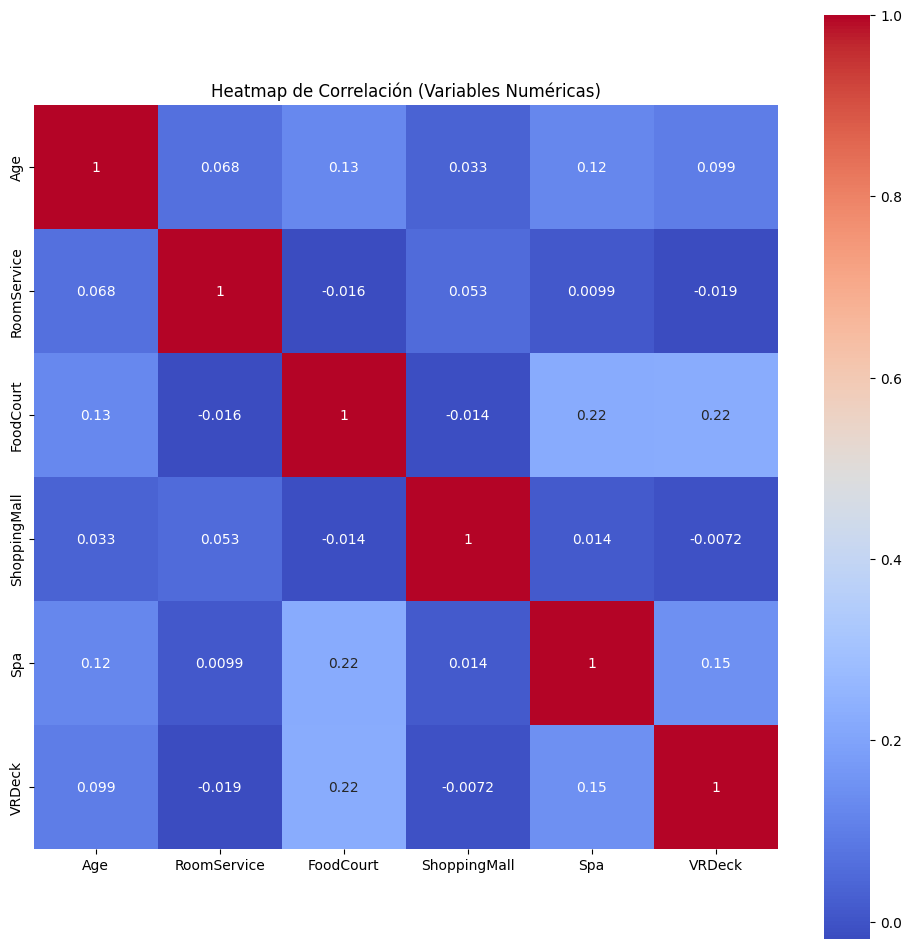

In [22]:
corr_matrix = df[numerical_cols].corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Heatmap de Correlación (Variables Numéricas)")
plt.show()

In [23]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin Type
0,0001_01,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


##### Distribuciones de variables númericas

Age
Mean: 28.81088231910733
Median: 27.0
Standard Deviation: 14.33953649111777
Minimum: 0
Maximum: 79


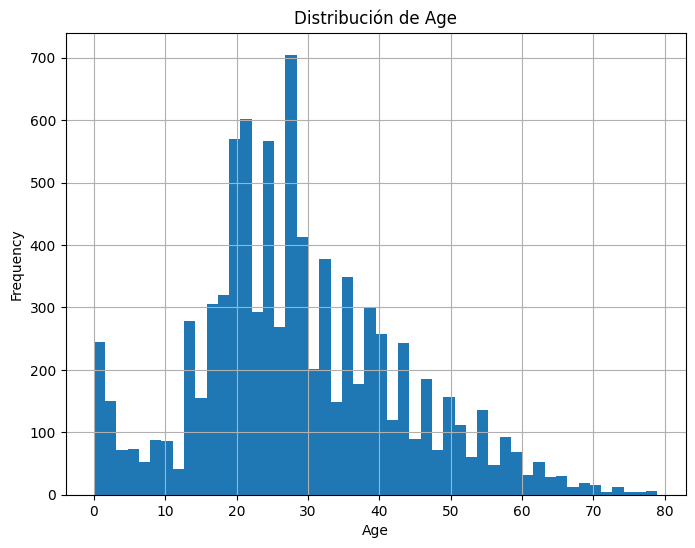

RoomService
Mean: 224.68761748120298
Median: 0.0
Standard Deviation: 659.7393636011294
Minimum: 0.0
Maximum: 14327.0


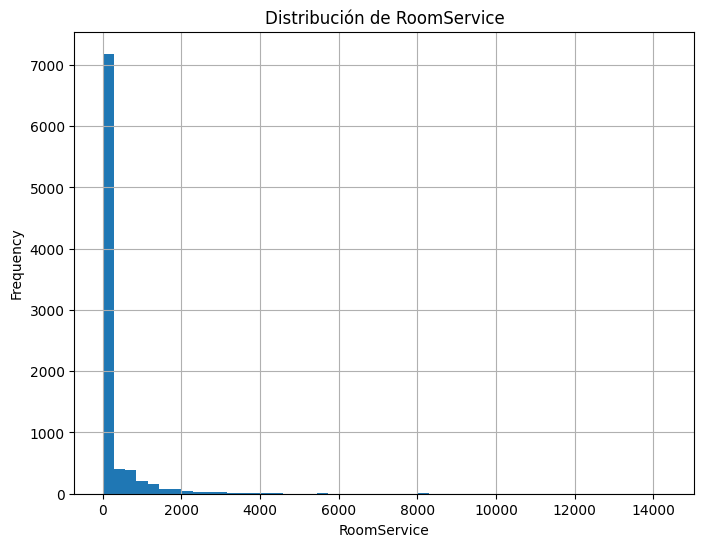

FoodCourt
Mean: 458.0772032902467
Median: 0.0
Standard Deviation: 1594.4349779842053
Minimum: 0.0
Maximum: 29813.0


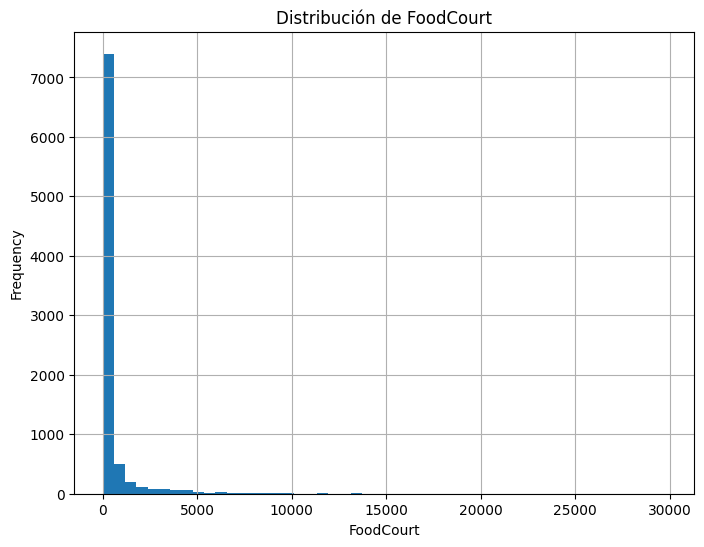

ShoppingMall
Mean: 173.72916912197994
Median: 0.0
Standard Deviation: 597.4174395331027
Minimum: 0.0
Maximum: 23492.0


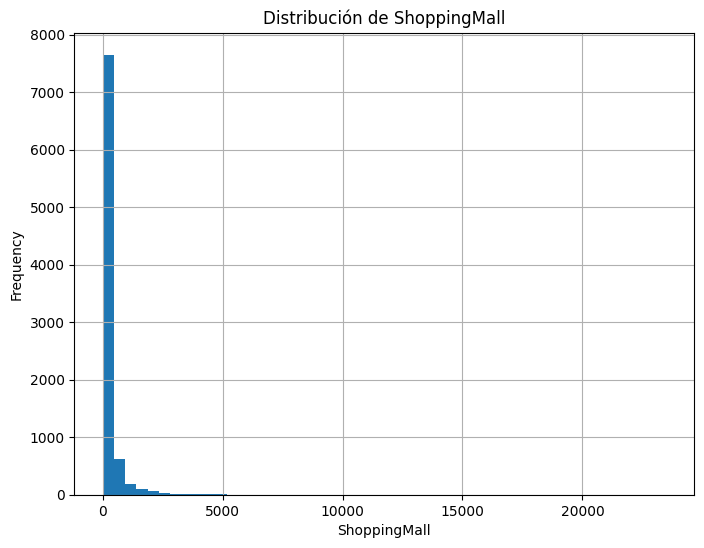

Spa
Mean: 311.1387779083432
Median: 0.0
Standard Deviation: 1124.675870630623
Minimum: 0.0
Maximum: 22408.0


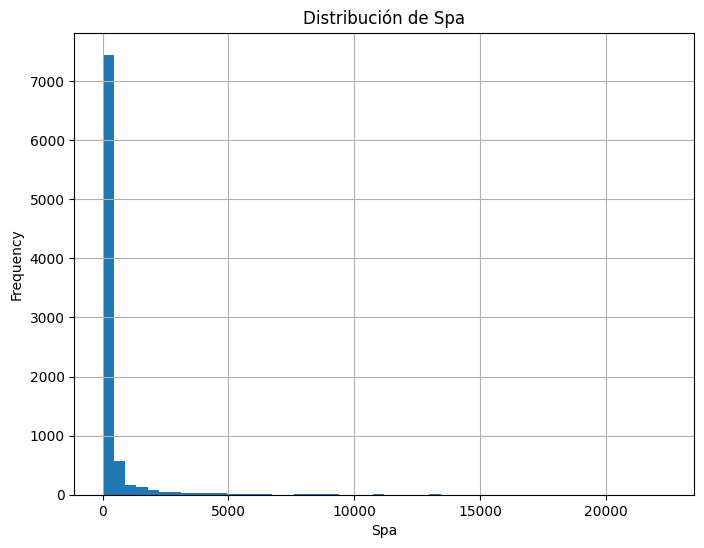

VRDeck
Mean: 304.85479129923584
Median: 0.0
Standard Deviation: 1133.2590492346646
Minimum: 0.0
Maximum: 24133.0


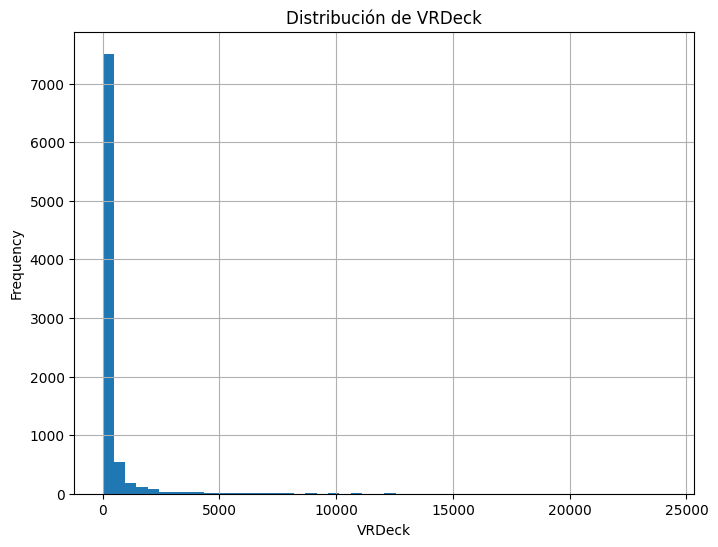

In [24]:
for col in numerical_cols:
    print(col)
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    print('Standard Deviation:', df[col].std())
    print('Minimum:', df[col].min())
    print('Maximum:', df[col].max())
    
    # Crear un histograma con matplotlib
    plt.figure(figsize=(8, 6))
    df[col].hist(bins=50)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### Distribuciones de Variables Categricas

In [25]:
df['Cabin Type'] = df['Cabin Type'].replace({'P': 0, 'S': 1})
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)

In [26]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin Type
0,0001_01,Europa,0,TRAPPIST-1e,39,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0
1,0002_01,Earth,0,TRAPPIST-1e,24,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,1
2,0003_01,Europa,0,TRAPPIST-1e,58,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,1
3,0003_02,Europa,0,TRAPPIST-1e,33,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,1
4,0004_01,Earth,0,TRAPPIST-1e,16,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1


In [27]:
df.shape

(8693, 15)

In [28]:
cat_select = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin Type']

HomePlanet
Unique values: 3
Value counts:
HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64


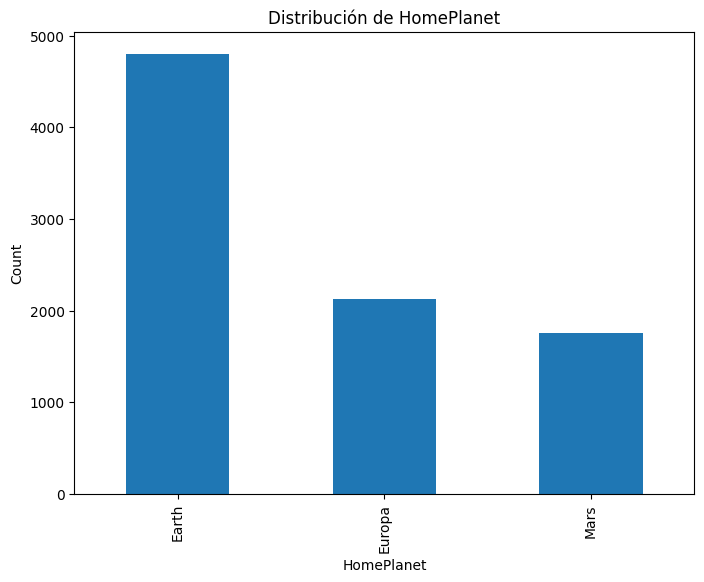

CryoSleep
Unique values: 2
Value counts:
CryoSleep
0    5656
1    3037
Name: count, dtype: int64


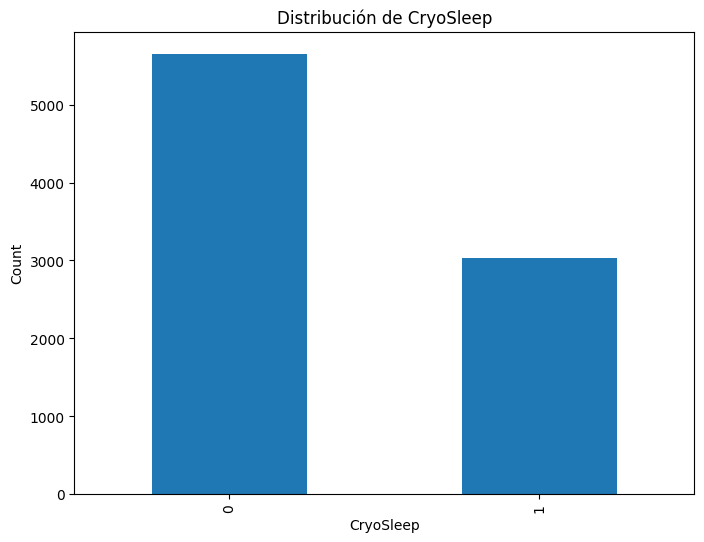

Destination
Unique values: 3
Value counts:
Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


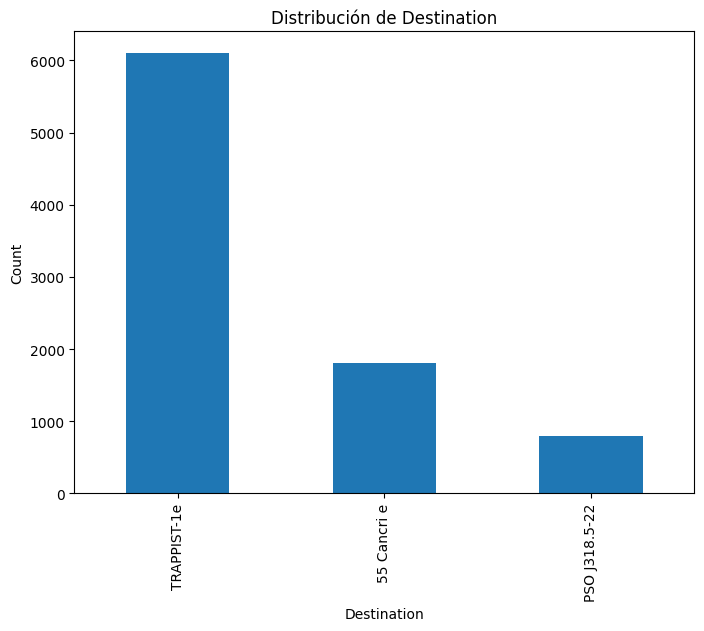

VIP
Unique values: 2
Value counts:
VIP
0    8494
1     199
Name: count, dtype: int64


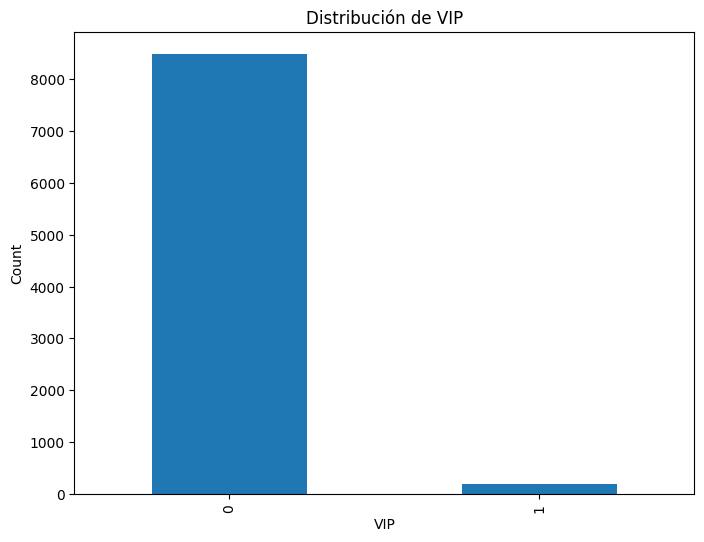

Deck
Unique values: 9
Value counts:
Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
S     199
T       5
Name: count, dtype: int64


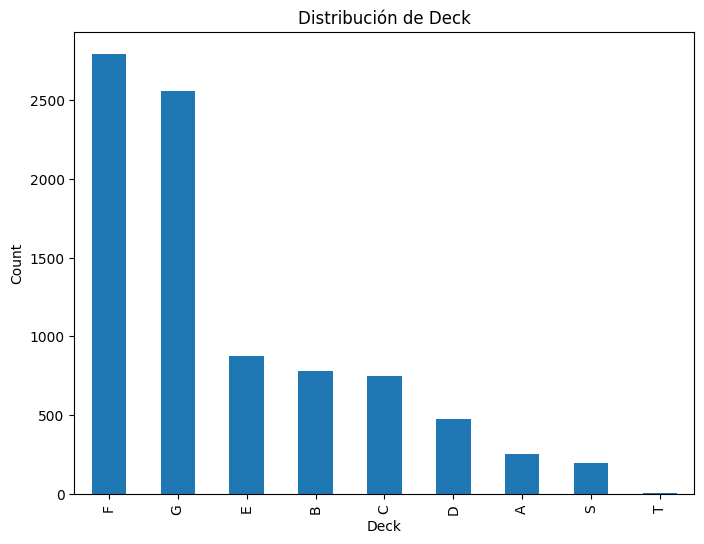

Cabin Type
Unique values: 2
Value counts:
Cabin Type
1    4487
0    4206
Name: count, dtype: int64


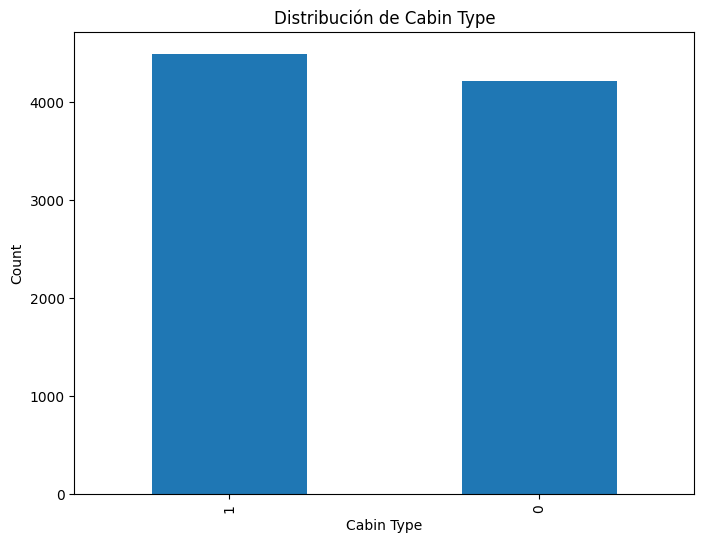

In [29]:
for col in cat_select:
    print(col)
    print('Unique values:', df[col].nunique())
    print('Value counts:')
    print(df[col].value_counts())
    
    # Crear un gráfico de barras con matplotlib
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### Analisis para la Variable Objetivo

In [30]:
df.shape

(8693, 15)

In [31]:
# Contar el número de ejemplares por clase
class_counts = df['Transported'].value_counts()
print(class_counts)

# Calcular la proporción de cada clase
class_proportions = df['Transported'].value_counts(normalize=True)
print(class_proportions)

Transported
True     4378
False    4315
Name: count, dtype: int64
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


In [32]:
# Entendimiento del normalize de la proporción
# Se cuentan los valores de que pertenecen a esa categoria y se dividen entre el total de elementos
x = 4378 / 8693
print(x)
y = 4315 / 8693
print(y)

0.5036236051995858
0.4963763948004141


In [33]:
# Crear el gráfico de barras interactivo
fig_bars = px.histogram(df, x='Transported', 
                        title='Número de Ejemplares por Clase de Transported',
                        labels={'Transported': 'Transported'},
                        category_orders={'Transported': [0, 1]})

# Configurar el diseño
fig_bars.update_layout(
    xaxis_title='Transported',
    yaxis_title='Número de Ejemplares',
    xaxis=dict(tickmode='linear', tickvals=[0, 1]),  # Asegura que ambos ticks estén visibles
    bargap=0.3,  # Ajusta el espacio entre barras
    width=800,   # Ajusta el ancho del gráfico
    height=600   # Ajusta la altura del gráfico
)

# Mostrar el gráfico
fig_bars.show()

In [34]:
# Calcular la proporción de cada clase
class_proportions = df['Transported'].value_counts(normalize=True)

# Crear el gráfico de pastel interactivo
fig_pie = px.pie(values=class_proportions, names=class_proportions.index,
                 title='Distribución de Clases de Transported',
                 labels={'values': 'Proporción', 'names': 'Clase'},
                 color_discrete_sequence=px.colors.qualitative.Plotly)

# Mostrar el gráfico
fig_pie.show()


In [35]:
# Crear el boxplot interactivo
fig = px.box(df, x='Transported', y='Age', 
             title='Distribución de Edad por Clase de Transported',
             labels={'Transported': 'Transported', 'Age': 'Edad'})

# Mostrar el gráfico
fig.show()

In [36]:
df_limpio = df.drop(['Deck'], axis= 1)

In [37]:
df_limpio.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Cabin Type      0
dtype: int64

In [38]:
df_limpio.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin Type
0,0001_01,Europa,0,TRAPPIST-1e,39,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,0,TRAPPIST-1e,24,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,0,TRAPPIST-1e,58,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,0,TRAPPIST-1e,33,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,0,TRAPPIST-1e,16,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


In [39]:
df_limpio.to_parquet(r'C:\Users\Manuel Montufar\Documents\ProyectosManu\Escuela\Concentración\Reto\Data\Base_Limpia.parquet')